In [11]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Experiment 2 - Coupled 3-box

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [16]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 3

# Initialize forcing vectors and run experiments
experiments = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, exp in enumerate(experiments):
  full_outputs[exp] = BudykoSellers.Run_Budyko_Sellers(exp_flag=i, n_boxes=n_boxes, diff_flag=1)
  forcings[exp] = np.tile(full_outputs[exp]['forcing_ts'], (n_boxes, 1))
  T_out[exp] = np.squeeze(full_outputs[exp]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:320: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


### Method X: DMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.034122067424088194
	Test: High Emissions - 0.4683655285012255
	Test: Overshoot - 0.28755003557090564
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.8360804222092052
	Test: High Emissions - 0.0005282882282083399
	Test: Overshoot - 0.437189256211823
Train: Overshoot - L2 Error
	Test: 2xCO2 - 1.8987355757087305
	Test: High Emissions - 0.029059969359319107
	Test: Overshoot - 0.00012299965926887568


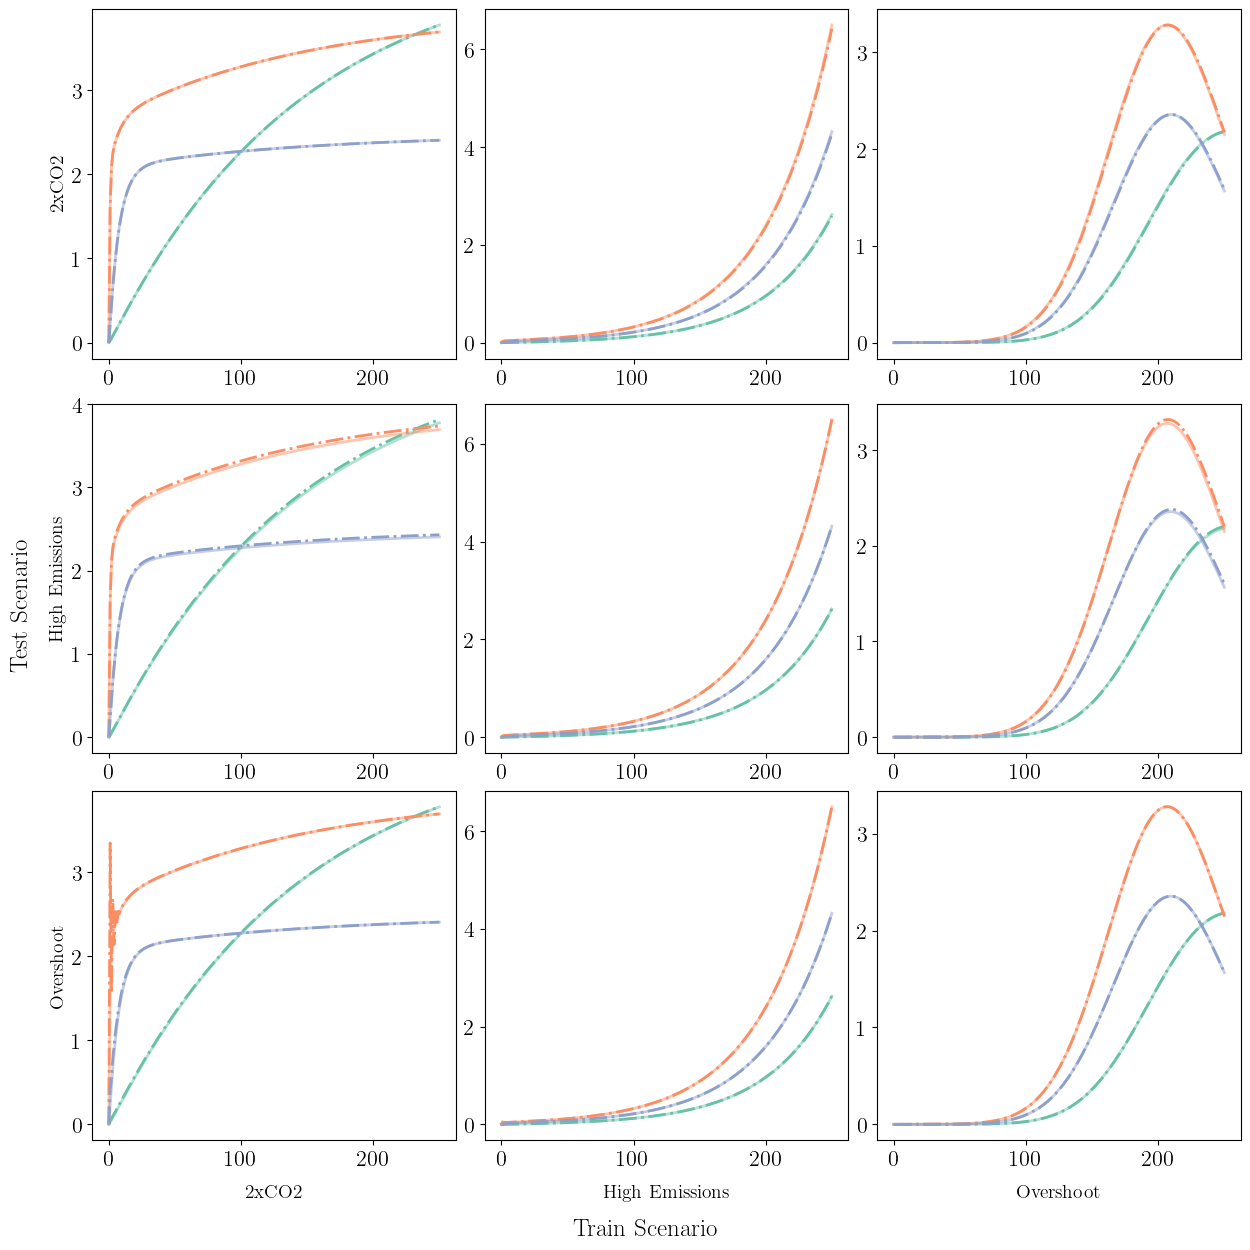

In [17]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD, L2_DMD = emulator_utils.emulate_experiments('DMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt, n_steps=n_steps, n_boxes=n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, experiments)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.034122067423952115
	Test: High Emissions - 0.468365528501323
	Test: Overshoot - 0.28755003557101794
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.836080422194499
	Test: High Emissions - 0.0005282882283142845
	Test: Overshoot - 0.43718925620883
Train: Overshoot - L2 Error
	Test: 2xCO2 - 1.898735575680888
	Test: High Emissions - 0.02905996935737365
	Test: Overshoot - 0.00012299968759071488


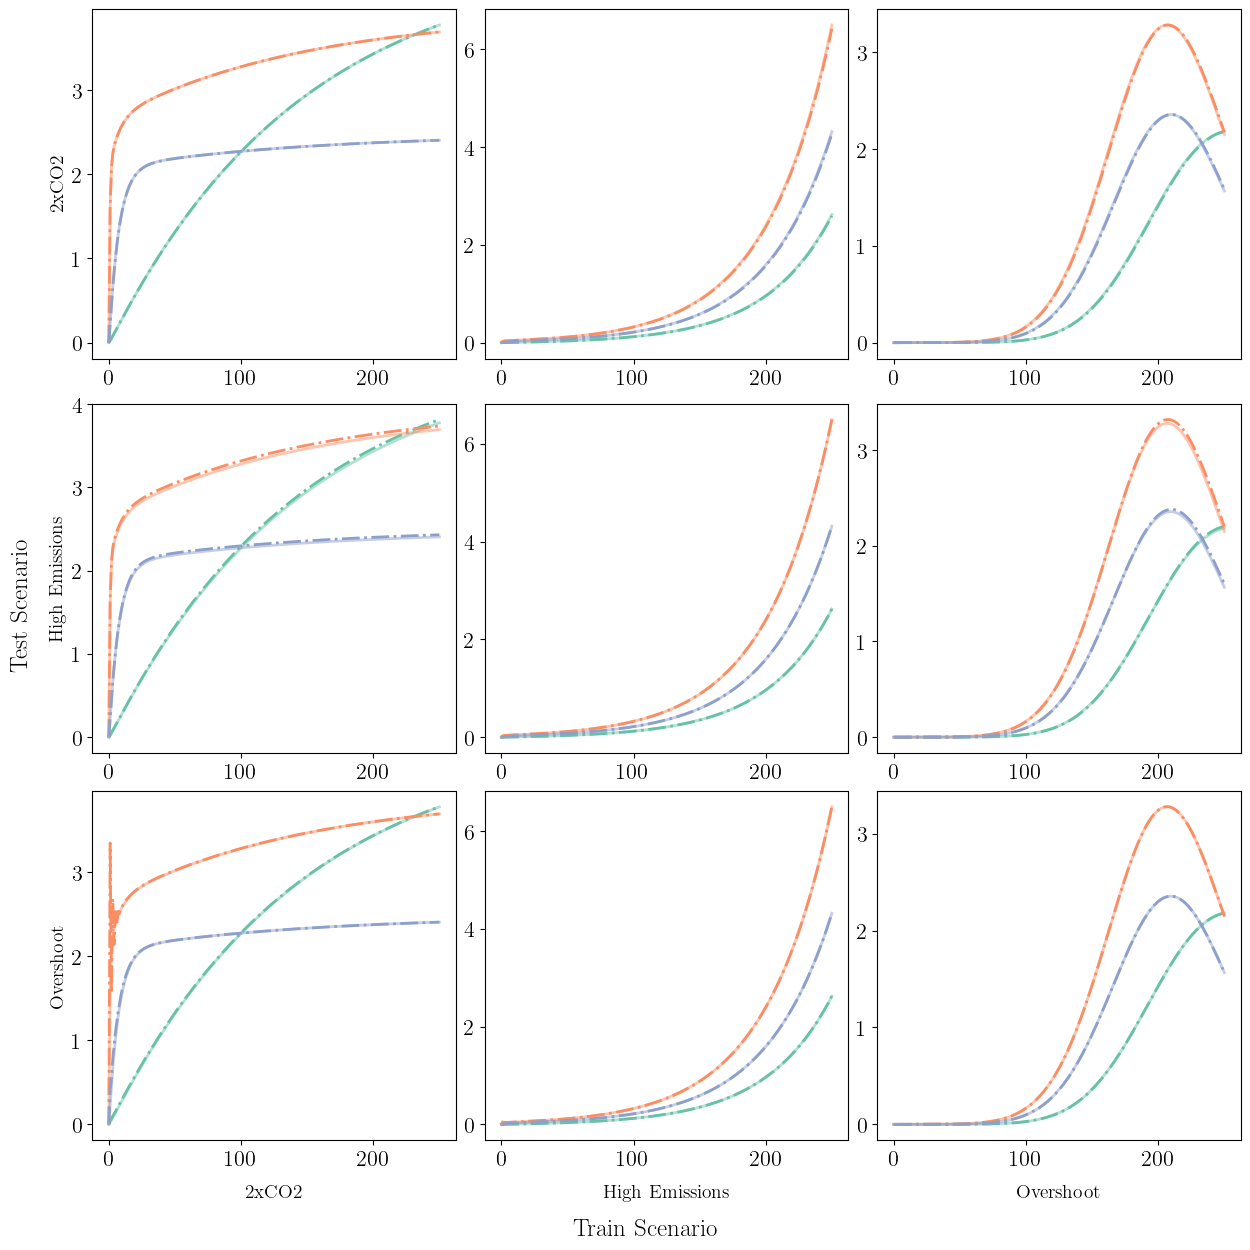

In [21]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='hermite', degree=1)
F_dict = emulator_utils.Vector_Dict(method='hermite', degree=1)
operator_EDMD, T_pred_EDMD, L2_EDMD = emulator_utils.emulate_experiments('EDMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt,
                                                                n_steps=n_steps, n_boxes=n_boxes, w_dict=w_dict, F_dict=F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, experiments)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 1.163644077129339e-14
	Test: High Emissions - 0.45576652939372875
	Test: Overshoot - 0.2802144123323854
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.8164106059823646
	Test: High Emissions - 2.7880740451135308e-14
	Test: Overshoot - 0.42590862642720134
Train: Overshoot - L2 Error
	Test: 2xCO2 - 670246.8701448546
	Test: High Emissions - 10964.739134837075
	Test: Overshoot - 4.150649535151845e-14


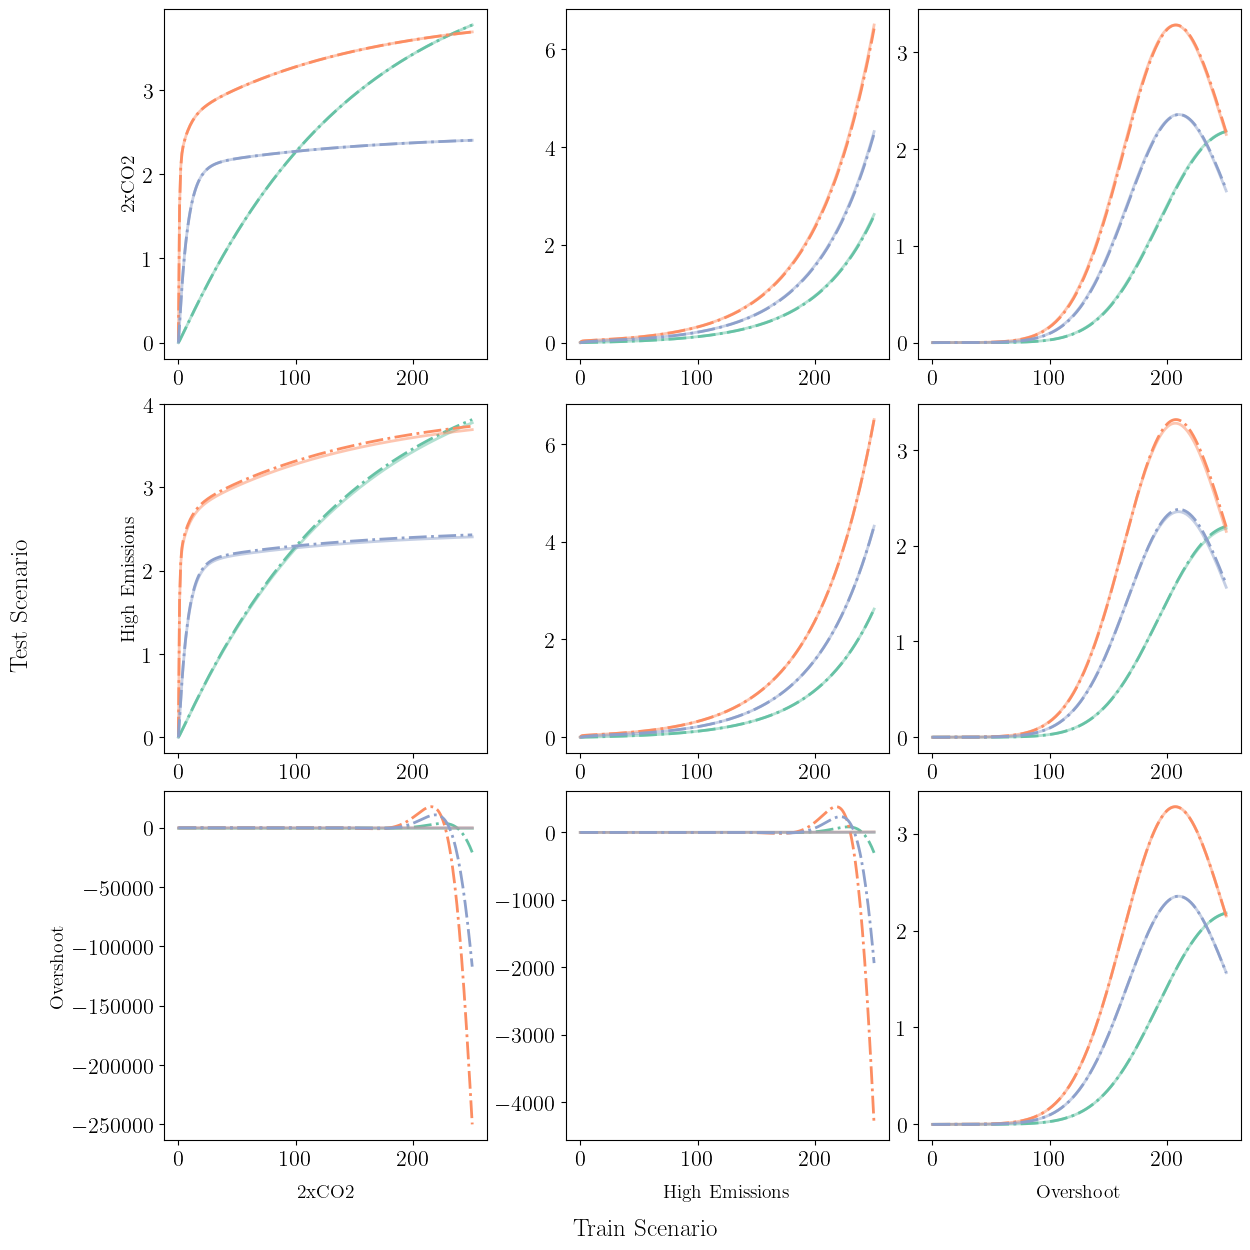

In [22]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve, L2_deconvolve = emulator_utils.emulate_experiments('deconvolve', experiments=experiments, outputs=T_out, forcings=forcings, dt=dt)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, experiments)

### Method X: Direct Diagnosis (FDT)

Train: Impulse Forcing - L2 Error
	Test: 2xCO2 - 1.0718384263956662
	Test: High Emissions - 0.20347734173952758
	Test: Overshoot - 0.5188176232805116


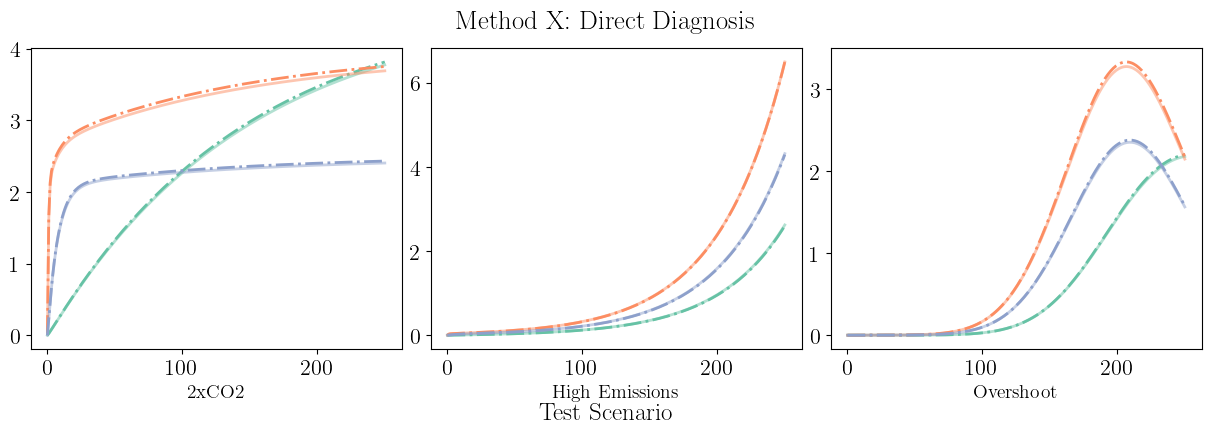

In [8]:
operator_direct, T_pred_direct, L2_direct = emulator_utils.emulate_experiments('direct', experiments=experiments, outputs=T_out, forcings=forcings, n_boxes=n_boxes, dt=dt, diff_flag=1)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, experiments)

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 0.70097032  0.96234161  0.65075129 -0.85527031]
	Test: 2xCO2 - 17.85298182541066
	Test: High Emissions - 13.996652951646954
	Test: Overshoot - 11.093096343334837
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.50260342  1.24832663  0.82952999 -0.95488689]
	Test: 2xCO2 - 26.908136441990216
	Test: High Emissions - 0.15265473657557455
	Test: Overshoot - 7.69601421950838
Train: Overshoot - L2 Error
Exponential Fit Results:
 [ 0.45131313  0.92004864  0.64815081 -0.9271233 ]
	Test: 2xCO2 - 23.251028205573547
	Test: High Emissions - 3.902533455919931
	Test: Overshoot - 6.979250144561851


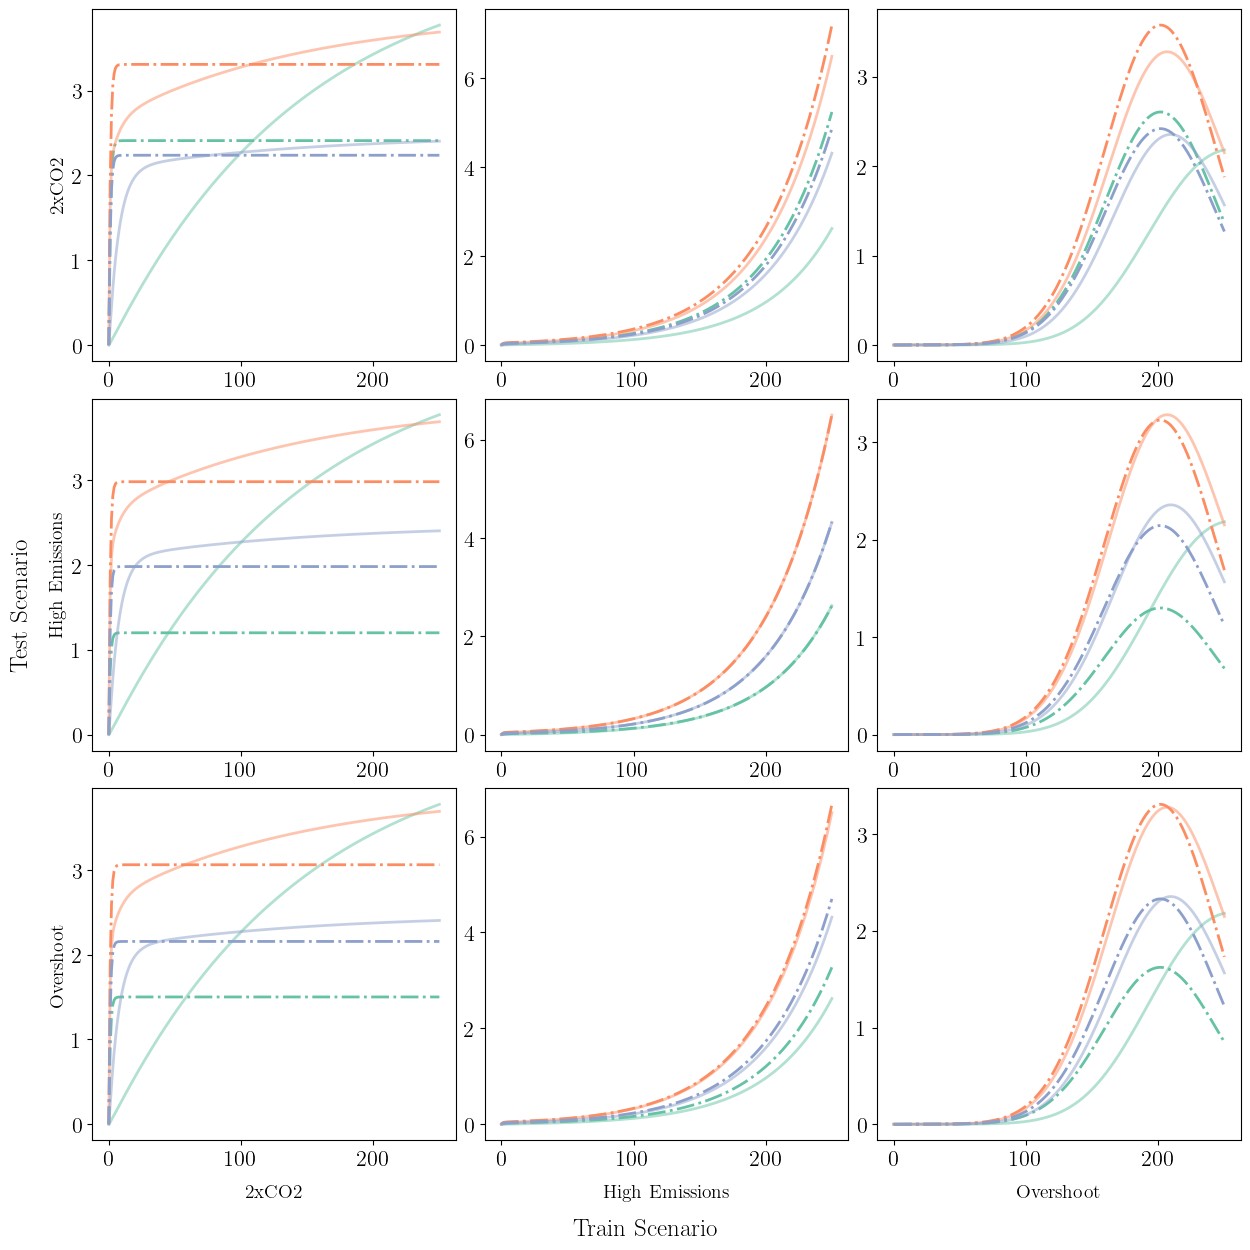

In [9]:
operator_fit, T_pred_fit, L2_fit = emulator_utils.emulate_experiments('fit', experiments=experiments, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=1, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit, experiments)

#### Method X: Pattern Scaling

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 11.330774255008542
	Test: High Emissions - 10.241947587477947
	Test: Overshoot - 7.9600460038996275
Train: High Emissions - L2 Error
	Test: 2xCO2 - 22.360661152081374
	Test: High Emissions - 0.12887542999629928
	Test: Overshoot - 5.926654454253345
Train: Overshoot - L2 Error
	Test: 2xCO2 - 17.157155112315177
	Test: High Emissions - 3.631537991742921
	Test: Overshoot - 4.907170937352291


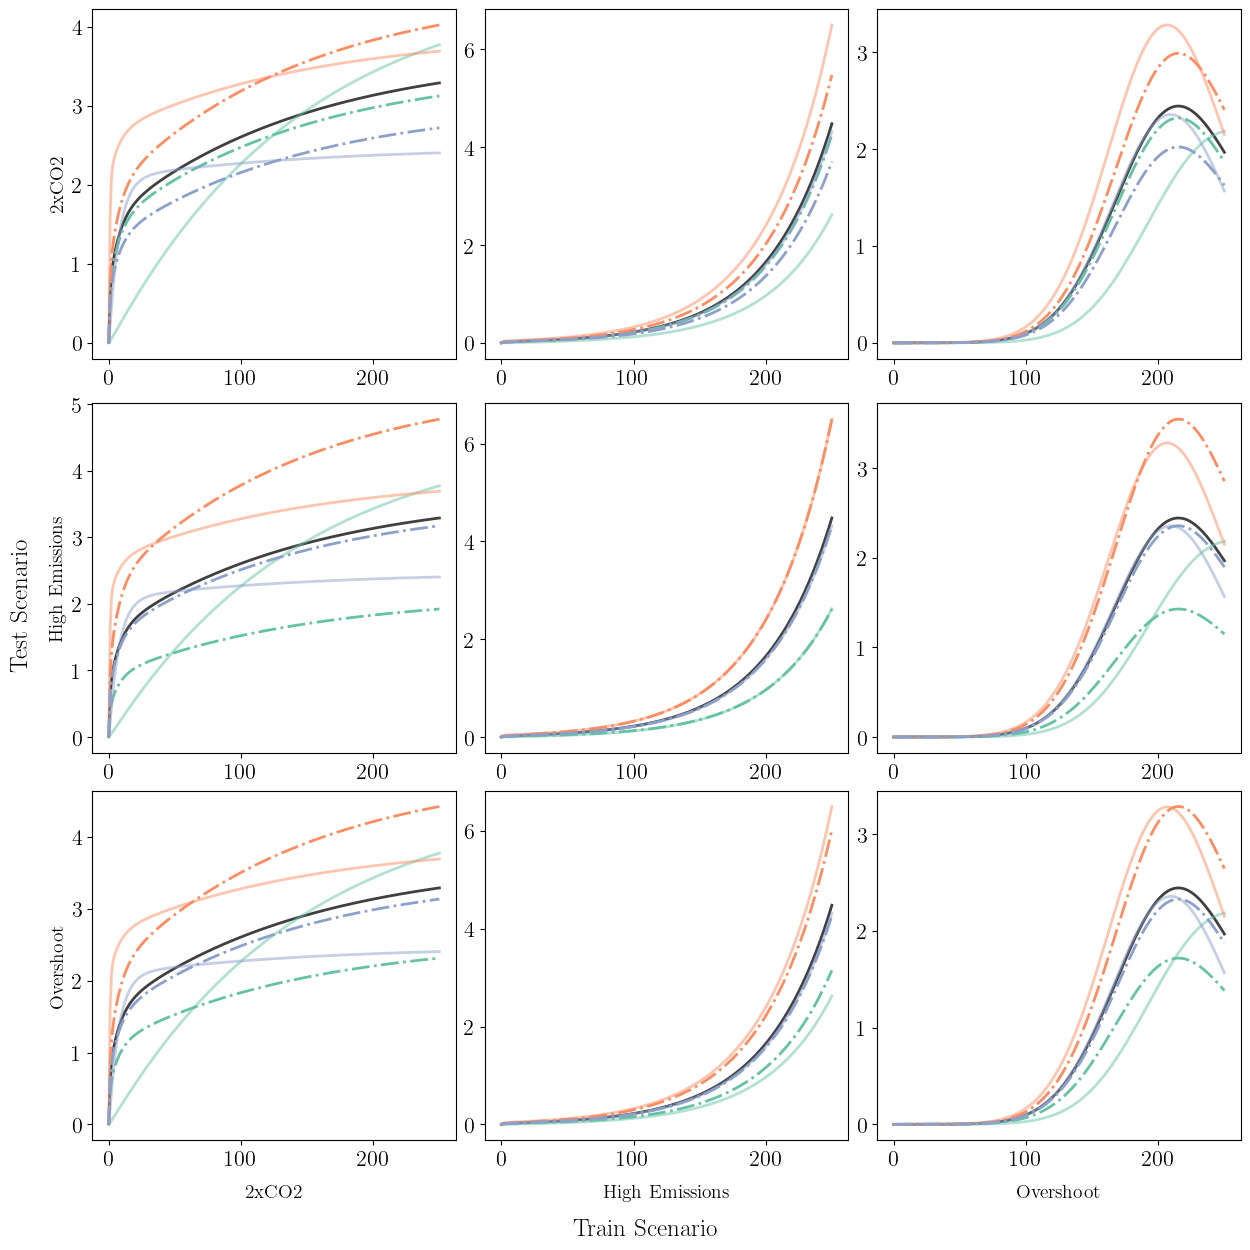

In [10]:
operator_PS, T_pred_PS, L2_PS = emulator_utils.emulate_experiments('PS', experiments=experiments, outputs=T_out, forcings=forcings)
emulator_utils.plot_true_pred(T_out, T_pred_PS, experiments, operator='PS')